# Plotting RNAseq results with R

In reality, RNAseq analyses are not done in Excel but using programming languages such as R or python. Here, you will get a very first glimpse into the programming language **R**. We will use a simple R script to recreate the MA-plot from the script and also to plot boxplots for all the genes significantly different (FDR<0.05) between the queens and larvae.


## Load the required packages

First, we load some published packages that contain functions we later need for our plots. There are over 10000 R packages available for you to use.

In [ ]:
library(reshape2) # this is a popular package for reorganizing data
library(ggplot2) # this is a popular package for plotting data


## Load the data

Next, we will load the file from the practical in a data frame that we call `df`, so we can manipulate the data in R. 

In [118]:
df<-read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTx0wPDq4HaOj6W51nimQtKkXz21x4p-JO27JnUMputmWnUb-Tem6HB9K_H3R01CubhlkfdSeVg5gYQ/pub?gid=2031264463&single=true&output=tsv",sep="\t",dec = ".")
df$sign<-ifelse(df$p.value.T.test.<0.000401862,"sign.","non-sign.")

Have a look how this looks by using the `head()` function.

In [60]:
head(df)

,gene,Queen.Mean,Queen.Median,Larva.Mean,Larva.Median,Overall.Mean,Overall.Median,Fold.Change,log2.FC.,p.value.T.test.,significance..p.0.05.,significance..FDR.0.05.,Mean..q.0.05.,logFC..q.0.05.
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
1,WEOB_001,2204.93,2259.31,2342.57,2085.13,2273.75,2172.22,0.941,-0.087,0.728657,,,0.00,0.00
2,WEOB_002,2385.73,2152.79,1693.87,1587.24,2039.80,1870.01,1.408,0.494,0.034347,*,,0.00,0.00
3,WEOB_003,1124.67,1031.30,649.54,364.33,887.10,697.82,1.731,0.792,0.202983,,,0.00,0.00
4,WEOB_004,3296.11,3002.35,2573.64,2523.69,2934.88,2763.02,1.281,0.357,0.072232,,,0.00,0.00
5,WEOB_005,3163.27,3023.72,2896.15,2979.92,3029.71,3001.82,1.092,0.127,0.526151,,,0.00,0.00
6,WEOB_006,5015.69,4899.15,3849.48,3809.99,4432.59,4354.57,1.303,0.382,0.000065,*,***,4432.59,0.38


In [ ]:
In addition, we load the FPKM values for all genes. 

In [ ]:
df.fpkm<-read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTx0wPDq4HaOj6W51nimQtKkXz21x4p-JO27JnUMputmWnUb-Tem6HB9K_H3R01CubhlkfdSeVg5gYQ/pub?gid=1658065490&single=true&output=tsv",sep="\t",dec = ".")

In [ ]:
head(df.fpkm)

## Plotting
### MA plot

Now, we will plot the MA plot using the function `ggplot()` and other functions of the `ggplot2` library.

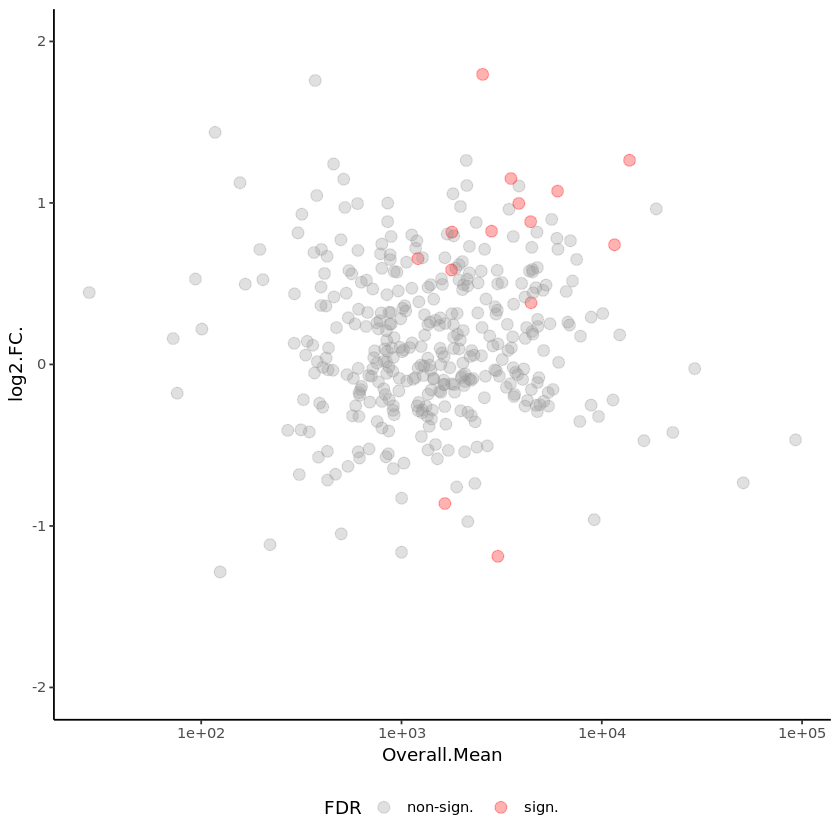

In [127]:
ggplot(df)+                                                # initiate the plot
geom_point(mapping =                                       # define what kind of plot you want to create
                     aes(x=Overall.Mean,                   # define what should be plotted at the x-axis
                         y=log2.FC.,                       # define what should be plotted at the y-axis
                         col=sign),                         # define how the points should be colored                             
           alpha=.3,                                       # set the visibility of each point to 30 %
           size=3)+                                        # define the size of each point to be 
scale_x_log10()+                                           # scale the x-axis logarithmically
theme_classic()+                                           # define the basic design of the plot
scale_color_manual(values = c("grey60","red"),name="FDR")+  # define the colors to use
theme(legend.position = "bottom")+                          # set the legend to be plotted to the bottom
coord_cartesian(ylim=c(-2,2))                              # set the range of the y-axis

### Boxplots 

First, we transform the `df.fpkm` data frame to a so-called *long format*. We need to reorganize the data so the plotting function can read the data properly.

In [105]:
long.df.fpkm <- melt(df.fpkm, id.vars = c("gene", "X","Gene.length"))
long.df.fpkm$Group<-substr(long.df.fpkm$variable,1,5)


Next, we create two subsetted data frames: One containing only the **significant genes** and another containing 14 **random genes**.

In [115]:
# significant genes
significant.genes<-df$gene[df$p.value.T.test.<0.000401862]
long.df.fpkm.significant<-subset(long.df.fpkm,gene %in% significant.genes)

# random genes
random.genes<-sample(df$gene,size = 14,replace = F)
long.df.fpkm.random<-subset(long.df.fpkm,gene %in% random.genes)

Finally, we plot the FPKM values for all significantly different genes as boxplots for queens and larvae separately. 

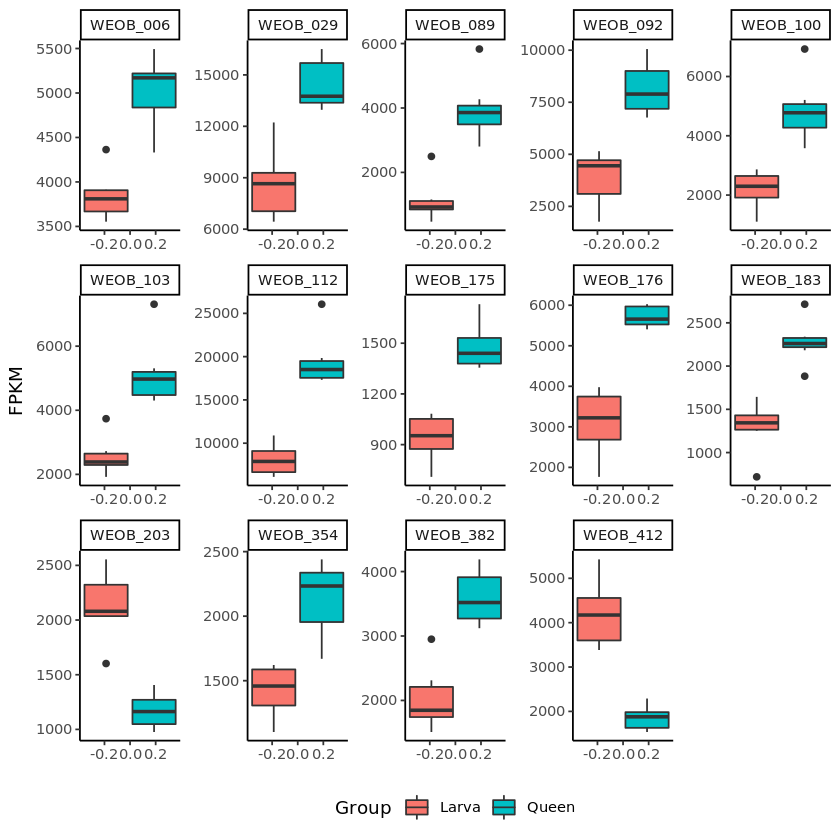

In [107]:
ggplot(long.df.fpkm.significant)+
geom_boxplot(aes(fill=Group,y=value))+
facet_wrap(~gene,scales="free",nrow=3)+
theme_classic()+
theme(legend.position = "bottom")+
ylab("FPKM")

If you compare this to 14 random genes, you see how different the expression patterns really are in the significant genes. 

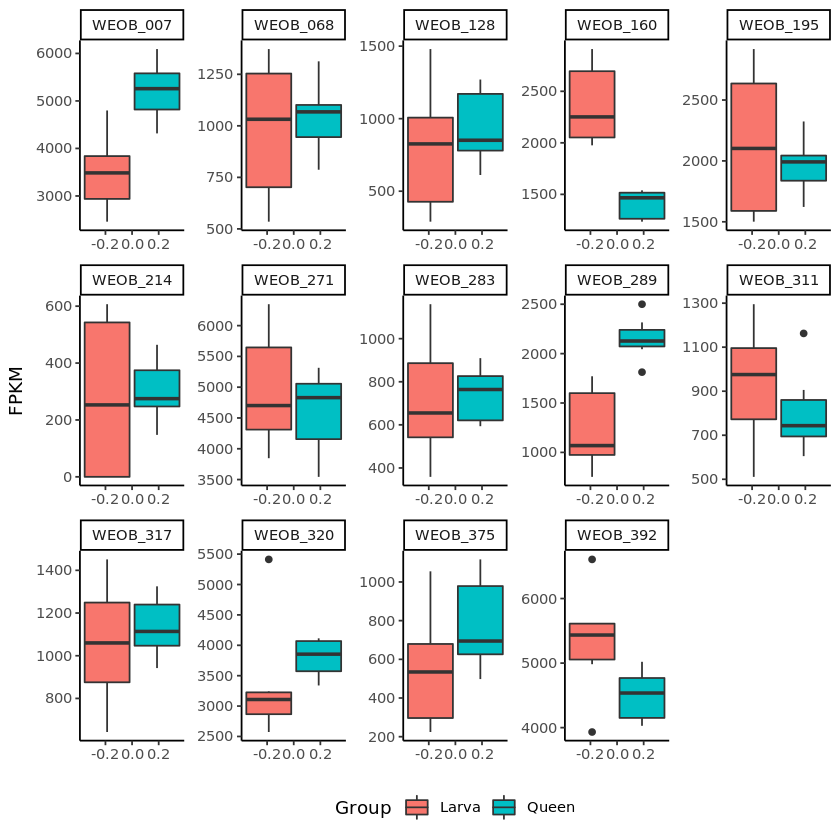

In [116]:
ggplot(long.df.fpkm.random)+
geom_boxplot(aes(fill=Group,y=value))+
facet_wrap(~gene,scales="free",nrow=3)+
theme_classic()+
theme(legend.position = "bottom")+
ylab("FPKM")